In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

train_df = pd.read_csv('../data/train.csv', parse_dates=['Date'], low_memory=False)
store_df = pd.read_csv('../data/store.csv')

print("Datasets loaded successfully.")

Datasets loaded successfully.


In [2]:
df = pd.merge(train_df, store_df, on='Store', how='left')

print("Dataframes merged.")
print(df.head())

Dataframes merged.
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1      

In [3]:
print("Missing values before cleaning:")
print(df.isnull().sum())

df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)

df.fillna(0, inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


C:\Users\zaid1\AppData\Local\Temp\ipykernel_12736\129627695.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)



Missing values after cleaning:
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


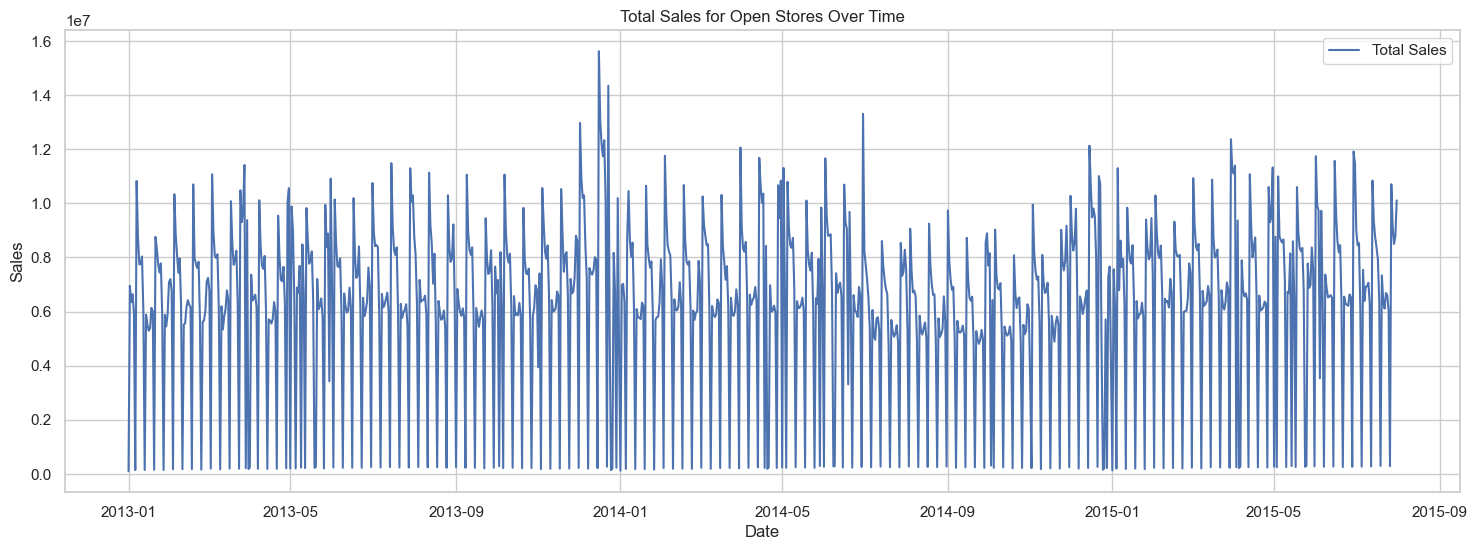

In [4]:
df_open = df[(df['Open'] == 1) & (df['Sales'] > 0)]

daily_sales = df_open.groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(18, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'], label='Total Sales')
plt.title('Total Sales for Open Stores Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

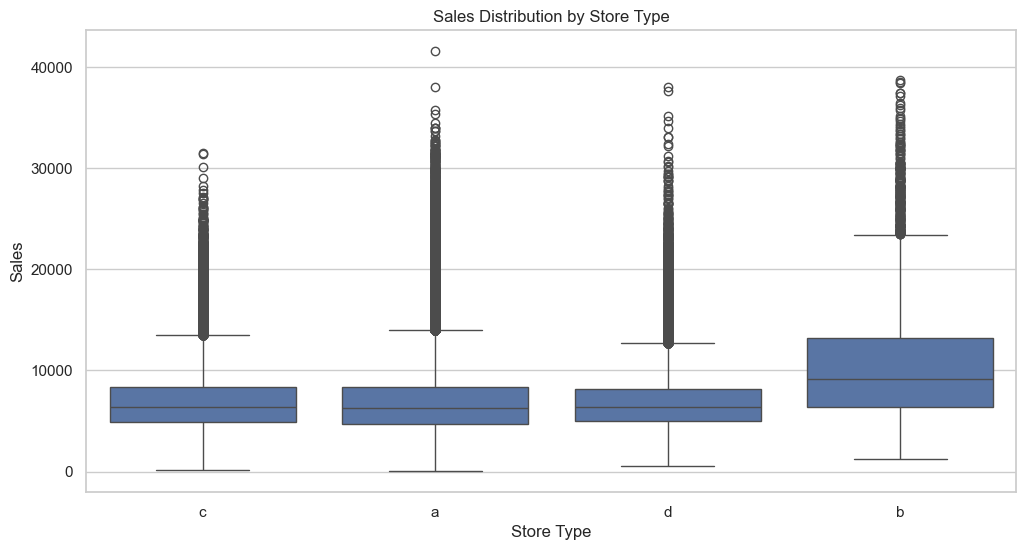

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='StoreType', y='Sales', data=df_open)
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()